#  Question 2 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt

# Part A (Newman 9.5 a)

In this question we will explain the instability of the FTCS method when applied to a one dimensional wave equation. The system we will solve describes a string struck by a hammer, and is as follows:

\begin{align}
\frac{\text{d}\phi}{\text{d}t} &= \psi(x,t), & \frac{\text{d}\psi}{\text{d}t} &= \frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a,t) - 2 \phi(x,t)] \\
& \text{where} & \phi(x) &= C \frac{x(L-x)}{L^2}\text{exp}\Big[-\frac{(x-d)^2}{2\sigma^2}\Big]
\end{align}

and we take length $L=1$m, distance to strike point $d=10$cm, wave speed $v=100$ms$^{-1}$, and constants $C=1$ms$^{-1}$ and $\sigma=0.3$m. We apply Euler's method to obtain:

\begin{align}
\phi(x,t+h) &= \phi(x,t) + h\psi(x,t), & \psi(x,t+h) &= \psi(x,t) +h\frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a,t) - 2 \phi(x,t)],
\end{align}

and use a step size of $h=10^{-6}$s. We modify the program $\texttt{heat.py}$ from Newman (FTCS algorithm to solve heat equation} to solve for this equation instead. The first block of code is the main loop of the code, and in the following block we plot the results for various times - for comparison we take the same tames as in the textbook.

In [2]:
# Constants
L = 1      # Length of string
d = 0.1    # Strike point
C = 1      # Wave speed
v = 100    # Wave phase speed
sig = 0.3  # Constant
N = 100    # Number of divisions in grid
a = L/N    # Grid spacing
h = 1e-6   # Time-step

# Create arrays
phi = np.zeros(N+1,float)   # initial positions (all zero)
phip = np.zeros(N+1,float)  # additional array to iterate with
# define array of valocities according to initial condition
x = np.linspace(0,L,N+1)    # grid of positions for calculating phi
psi = (C*x*(L-x)/(L*L))*np.exp(-((x-d)**2)/(2*sig**2))   
psip = np.copy(psi)         # additional array to iterate with

wave = []
# Main loop
t = 0.0
c = h*(v*v)/(a*a)
while t < 0.1 + 1e-07:
    # Calculate the new values of phi
    phip[1:N] = phi[1:N] + h*psi[1:N]
    # Calculate the new values of psi
    psip[1:N] = psi[1:N] + c*(phi[2:N+1]+phi[0:N-1]-2*phi[1:N])
    # Switch to new values and increment for next loop
    phi, psi = np.copy(phip), np.copy(psip)
    t += h
    wave.append(phi)

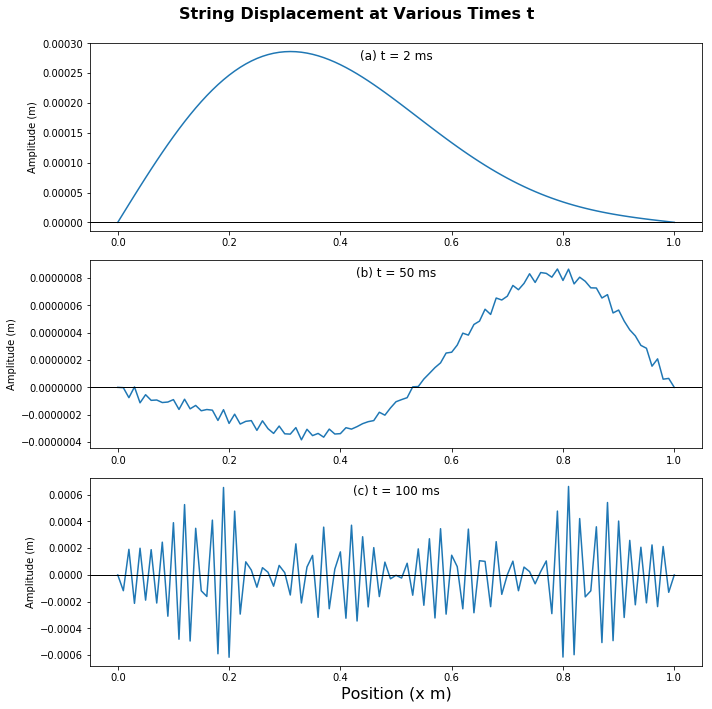

In [3]:
# Plot the results for times 2, 50, 100ms
fig = plt.figure(figsize=(10,10))
fig.suptitle('String Displacement at Various Times t', fontweight="bold", fontsize=16)

# t = 2ms corresponds to 100ms/50
ax1 = fig.add_subplot(3,1,1)
ax1.plot(x,wave[len(wave)//50])
ax1.axhline(y=0, color='black', linewidth=1)
ax1.set_title('(a) t = 2 ms', position=(0.5, 0.88))
ax1.set_ylabel("Amplitude (m)")

# t = 50ms corresponds to 100ms/2
ax2 = fig.add_subplot(3,1,2)
ax2.plot(x,wave[len(wave)//2])
ax2.axhline(y=0, color='black', linewidth=1)
ax2.set_title('(b) t = 50 ms', position=(0.5, 0.88))
ax2.set_ylabel("Amplitude (m)")

# t = 100ms corresponds to final element
ax3 = fig.add_subplot(3,1,3)
ax3.plot(x,wave[-1])
ax3.axhline(y=0, color='black', linewidth=1)
ax3.set_title('(c) t = 100 ms', position=(0.5, 0.88))
ax3.set_xlabel("Position (x m)", fontsize=16)
ax3.set_ylabel("Amplitude (m)")

plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

These are exactly the plots given in the textbook! While the solution starts well, an instability quickly develops and the noise grows very quickly until it soon dominates the simulation. We have thus succesfully shown the unstable nature of the FTCS algorithm when applied to the wave equation. For an explanation of why the instability develops, see section 9.3.2 in Newman for an explanation of von Neumann stability analysis.

# Animation (Part B)

Now we'll do something fun - instead of looking at fixed plots as above, let's animate the string evolution and watch it move! Do do this, note that above we appended the position array for each time to a master list called $\texttt{wave}$. Here we will use the animation package in matplotlib to cycle through indices and plot each array, thus creating a smooth movie of the vibrating string. Run the code below and enjoy!

In [4]:
%matplotlib nbagg

<IPython.core.display.Javascript object>


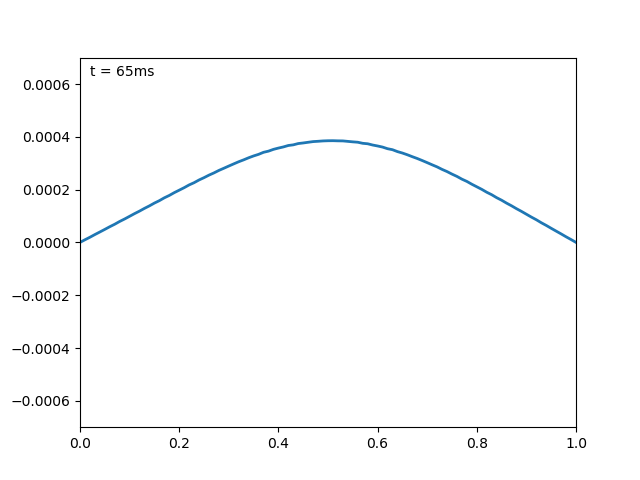

In [5]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, max(x)), ylim=(-0.0007,0.0007)) # set axes
line, = ax.plot([], [], lw=2) # define the line we will plot
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes) # include time label

# initialization function: plot the background of each frame
def init():
    line.set_data([], []) # initialize line
    time_text.set_text('') # initialize time label
    return line,

# animation function.  This is called sequentially, looping with i
# On each increment, call each i*100th element of wave (to go faster)
def animate(i):
    line.set_data(x, wave[i*100]) # plot every 100 time steps
    time_text.set_text('t = ' + str(int(i*h*100*1000)) + 'ms') # time label
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1200, interval=15, blit=False)

plt.show() # Enjoy!